In [1]:
import numpy as np
from utils import load_grey, test_parameters, subsample
from detection import full_detection, plot_zcr, get_meaningfulness
import matplotlib.pyplot as plt

from detection import get_crown_hist, compute_generating_hist
%matplotlib inline

# Random noise

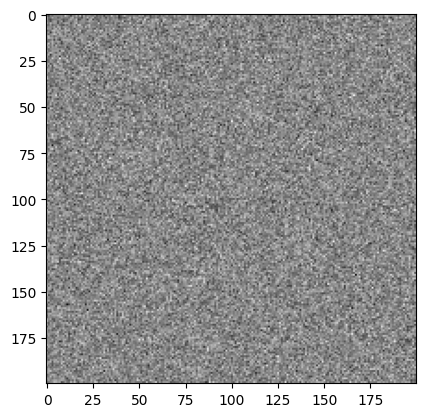

In [2]:
noise_img = np.random.randn(200, 200)
plt.figure()
plt.imshow(noise_img, cmap='grey')

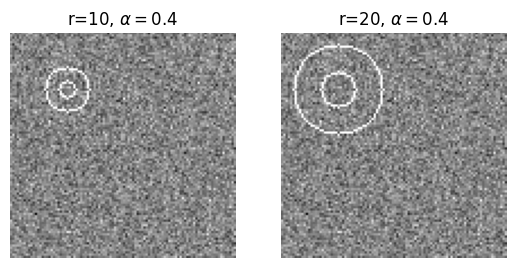

In [3]:
c = np.array([25, 25])
rmin = 10
rmax = 20
nr = 2
alpha = 0.4
test_parameters(noise_img, alpha, c, rmin, rmax, nr)

=== 1/5 Computing lambda values ===


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 474.76it/s]

=== 2/5 Computing Zrc values === 


  0%|          | 0/10000 [00:00<?, ?it/s]

=== 3/5 Filtering meaningful detections ===
computing aggregated map


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1007.52it/s]


found 1 detections
=== 4/5 Pruning detections with masking principle ===


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


computing aggregated map


100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

=== 5/5 Saving results to full_detection_noise.npz ===


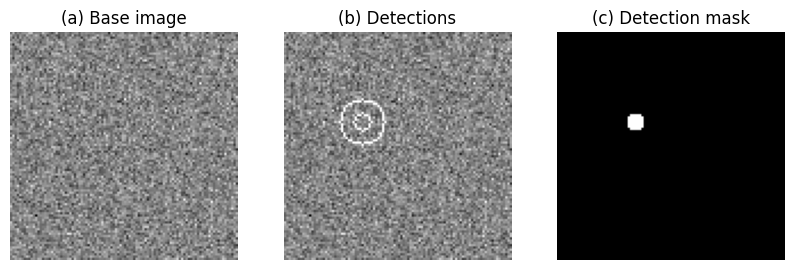

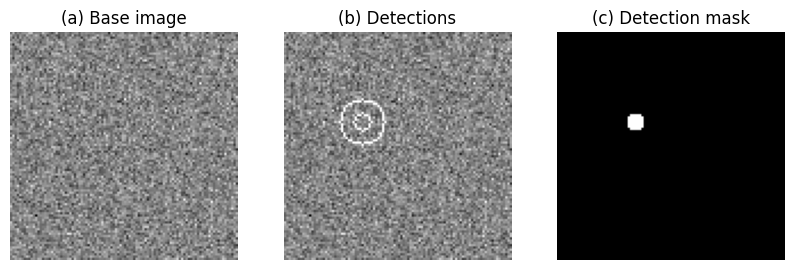

In [4]:
rmin = 10
rmax = 20
alpha = 0.4
nr = 5
eps= 50
b=10
full_detection(noise_img, rmin, rmax, nr, alpha, eps,b, 'full_detection_noise.npz')

# Pupil

In [5]:
pupil_img = load_grey('pupil.png')

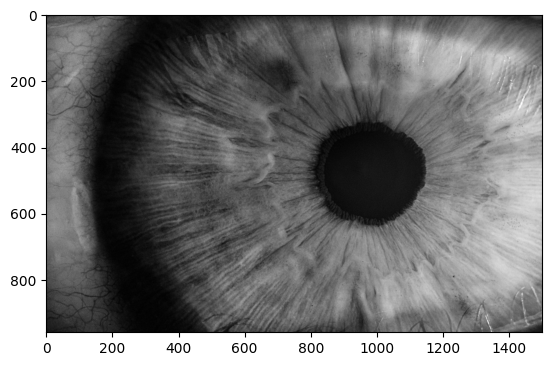

In [6]:
plt.figure()
plt.imshow(pupil_img, cmap='grey')

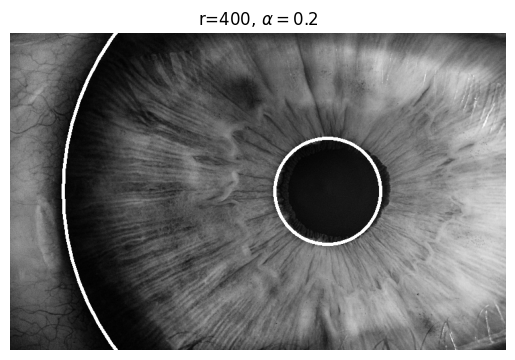

In [7]:
c = np.array([240, 480])
rmin = 400
rmax = rmin
nr = 1
alpha = 0.20
test_parameters(pupil_img, alpha, c, rmin, rmax, nr)

found 77930 well oriented pixels over 289027 (26.96%)


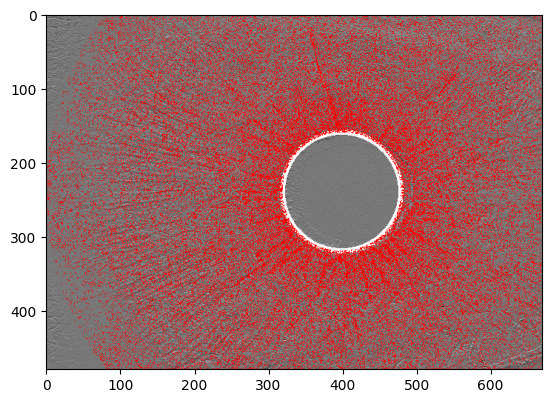

In [8]:
plot_zcr(pupil_img, c, rmin, alpha)

In [9]:
r = 400
rs = np.linspace(r, r, 1)
H, W = subsample(pupil_img).shape
alpha = 0.20
eps = 0.5
b = 10
zcr = 77930
NFA = get_meaningfulness(r, alpha, H, W, b, zcr, verbose=True) * H * W * len(rs)
print(f"Number of False Alarms for our circle: {NFA}")

Computing poly powers


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 665.97it/s]


Computing poly multiplication


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:37<00:00, 24.11s/it]

Number of False Alarms for our circle: 1.443761685616033e-07


# Sydney

In [10]:
sydney_img = load_grey("sydney.jpg")

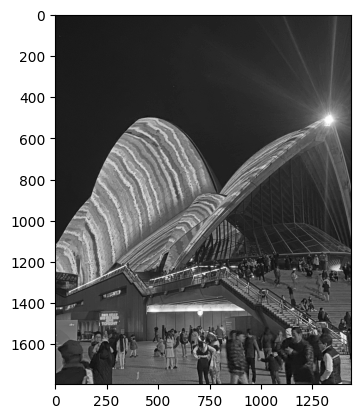

In [11]:
plt.figure()
plt.imshow(sydney_img, cmap='grey')

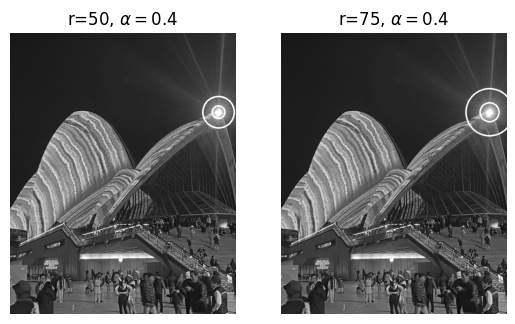

In [12]:
alpha = 0.4
c = np.array([255, 664])
rmin = 50
rmax = 75
nr = 2
test_parameters(sydney_img, alpha, c, rmin, rmax, nr)

=== 1/5 Computing lambda values ===


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.92it/s]

=== 2/5 Computing Zrc values === 


  0%|          | 0/645840 [00:00<?, ?it/s]

=== 3/5 Filtering meaningful detections ===
computing aggregated map


100%|████████████████████████████████████████████████████████████████████████| 112574/112574 [00:11<00:00, 9993.55it/s]


found 112574 detections
=== 4/5 Pruning detections with masking principle ===


100%|█████████████████████████████████████████████████████████████████████████| 112574/112574 [03:06<00:00, 603.48it/s]


computing aggregated map


100%|████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 5214.94it/s]


=== 5/5 Saving results to full_detection_sydney.npz ===


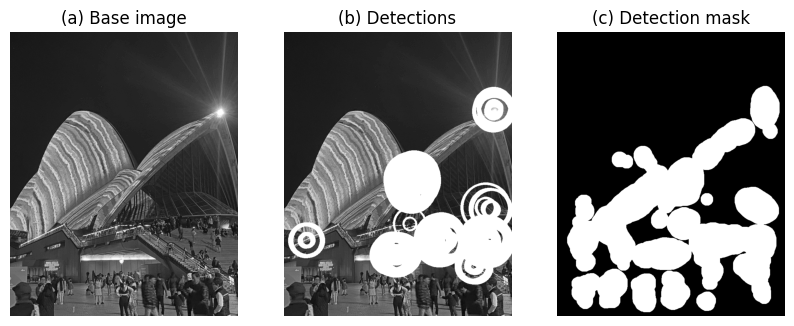

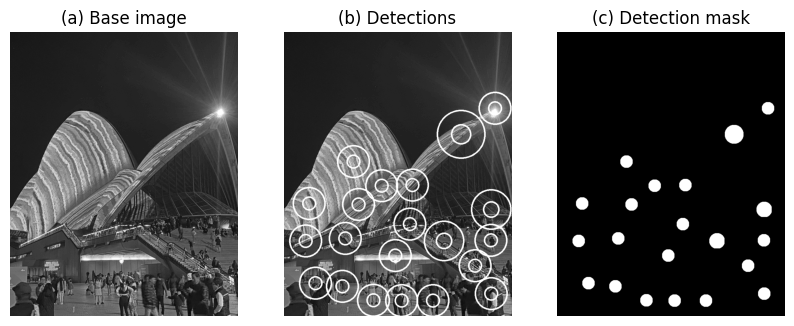

In [13]:
rmin = 50
rmax = 75
nr = 3
alpha = 0.4
eps=2
b=10
full_detection(sydney_img, rmin, rmax, nr, alpha, eps,b, 'full_detection_sydney.npz')